## With Hierarchical clustering, we seek to:
---
- Build hierarchies of clusters.
- Connect the clusters in the hierarchy with links.

Once the links are determined, we can display them in what is called a **dendrogram** - a graph that displays all of these links in their hierarchical structure.

To find clusters in a dendogram, we cut graph to find clusters.

## When does hierarchical clustering perform well?

---

- Hierarchical clustering works well for non-spherical clusters
- It also works well on smaller datasets - _this algorithm has a longer computational time and doesn't work well for larger datasets_
- Text based features also work well, but due to the nature of high dimensionality of text data, this type of algorithm will take a while to complete in these cases.

$$O(n^2 * n\ features)$$

### Hierarchical clustering works well for problems where data is consistently formed, no matter the shape.

## Hierarchical vs K-means clustering
---
Hierarchical clustering, like K-Means, is an unsupervised learning algorithm to divide our data into groups. In K-Means clustering the algorithm groups data into a pre-defined set of clusters based on determining centroid points for the K clusters, calculating the geometric mean of classified points, then moving the centroid until no points change class.

**In hierarchical clustering, the algorithm builds classification trees using the data that merge groups of similar data points.**

In K-Means, the boundaries between the various clusters are distinct and independent (see graph), whereas in hierarchical clustering there are shared similarities between those groups represented by the classification tree.  

**Hierarchical clustering does not require you to define "K" as an input!**

**K-Means**
- Aims to to achieve separation.
- Partitions are independent of each other.
- When your desired clusters are already conform to spherical shaped assumptions.

**Hierachical Clustering**
- Partitions can be visualized using a tree structure (a dendrogram).
- Does not need the number of clusters as input.
- Possible to view partitions at different levels of granularities (i.e., can refine/coarsen clusters).
- Guaranteed to converge to the same solution (no random initialization).

## How does hierarchical clustering work
---
There are two forms of hierarchical clustering; **agglomerative hierarchical clustering** and **divisive hierarchical clustering**. 
- Agglomerative goes from the bottom-up, starting with single data points and merging them into groups.
- Divisive goes from the top down, starting with all the data points and dividing them.

Whether starting from the top or bottom, at each step the algorithm makes the best choice it can to join or split the data based on the current sample. The hope is that these neighborhood best choices will approximate or equal the global best choice for clusters. It is an example of a **greedy algorithm**.

### Linkage clustering (form of agglomerative clustering)
---

Today, we'll look at one of the fundamental methods for agglomerative hierarchical clustering: **linkage clustering**. Linkage clustering iterates through datapoints and computes the distance between groups by computing the distance between two neighboring datapoints, using the **nearest neighbor** technique similar to KNN. 

The distance metric options for our **linkage method** that determines how to join, merge, or split our data can be either _Euclidean_ or _Squared Euclidean_ (Euclidean without the square root, ie: Manhattan).  The linkage method we will talk about today will be **"Wards Linkage"** method.

##### Common Linkage Methods (usually single, complete or centroid)

- **Average** Distance between two clusters is the average distance between an observation in one cluster and an observation in the other cluster
- **Centroid** Distance between two clusters is the distance between the cluster centroids.
- **Complete** The distance between two clusters is the maximum distance between an observation in one cluster and an observation in the other cluster.
- **Ward** The median distance between points within each cluster.
- **Single** The distance between two clusters is the minimum distance between the closest points between clusters.

> _Note: A **greedy algorithm** is an algorithm that follows the problem solving heuristic of making the locally optimal choice at each stage with the hope of finding a global optimum._



## Hierarchical clustering in Python
---

Implementing hierarchical clustering in python is as simple as calling a function from the SciPy toolbox:

```python
Z = linkage(X, 'single')
```

Here, "X" represents the matrix of data that we are clustering, and "single" tells our algorithm which method to use to calculate distance between our newly formed clusters - in this case **single linkage method** which seeks to find the minimum distance between clusters when forming clusters. When calculating distance, the default is **Euclidean distance**.

After we cluster, we can calculate the dendrogram using a simple ```dendrogram()``` function from SciPy, which we can then draw using our handy  ```plt``` from matplotlib. 

<a id='coph'></a>
### Evaluation with the cophenetic correlation coefficient

To check how well our algorithm has measured distance, we can calculate the **cophenetic correlation coefficient**. This metric measures the height of the dendrogram at the point where two branches merge. It can tell us how well the dendrogram has measured the distance between data points in the original dataset.

```python
c, coph_dists = cophenet(Z, pdist(X))
```

Here, we call the cophenetic function using ```cophenet``` from SciPy and apply it to our clustered set, Z, and the distance of our original set, X. 


## Code Example

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os

%matplotlib inline

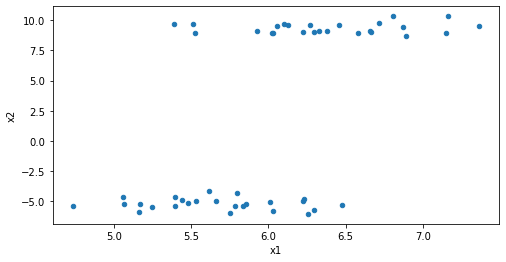

In [3]:
# Generate some wispy "sandwich" blobs
X, color = make_blobs(n_samples=50, random_state=13, centers=2, cluster_std=.5, )
X_map = map(lambda x: (x[0][0], x[0][1], color[x[1]]), zip(X, color))

points = pd.DataFrame(list(X_map), columns=["x1", "x2", "color"])
ax = points.plot(kind="scatter", x="x1", y="x2", figsize=(8, 4))


In [7]:
# Inspect Z linkage matrix
Z = linkage(X, 'single')

#### What does this matrix mean?

> _"A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster."_


In [5]:
# Put Z in to DataFrame for easy display
link = pd.DataFrame(Z, columns=['cluster_index_left', 'cluster_index_right', 'distance', 'support'])
link

cluster_index_left  cluster_index_right   distance  support
0                 14.0                 46.0   0.016601      2.0
1                  0.0                  4.0   0.060149      2.0
2                  6.0                 51.0   0.061095      3.0
3                  7.0                 18.0   0.070737      2.0
4                 34.0                 52.0   0.073546      4.0
5                 27.0                 39.0   0.082249      2.0
6                  9.0                 55.0   0.086783      3.0
7                 13.0                 49.0   0.086841      2.0
8                  2.0                 53.0   0.110434      3.0
9                 40.0                 57.0   0.111610      3.0
10                 5.0                 35.0   0.118236      2.0
11                 3.0                 41.0   0.119901      2.0
12                12.0                 42.0   0.132570      2.0
13                15.0                 60.0   0.134656      3.0
14                30.0                 56.0   0.142108      4.0
15                28.0                 48.0   0.155169      2.0
16                32.0                 63.0   0.160063      4.0
17                25.0                 45.0   0.164456      2.0
18                16.0                 64.0   0.189991      5.0
19                10.0                 66.0   0.217849      5.0
20                20.0                 31.0   0.222801      2.0
21                17.0                 50.0   0.225484      3.0
22                38.0                 58.0   0.230731      4.0
23                54.0                 71.0   0.234938      7.0
24                59.0                 73.0   0.239581     10.0
25                67.0                 72.0   0.240983      6.0
26                 1.0                 37.0   0.263757      2.0
27                61.0                 65.0   0.286581      4.0
28                29.0                 76.0   0.287622      3.0
29                33.0                 68.0   0.311880      6.0
30                69.0                 77.0   0.316595      9.0
31                75.0                 80.0   0.333161     15.0
32                43.0                 81.0   0.334474     16.0
33                11.0                 74.0   0.343728     11.0
34                26.0                 78.0   0.349953      4.0
35                22.0                 44.0   0.355731      2.0
36                21.0                 82.0   0.357099     17.0
37                23.0                 24.0   0.368862      2.0
38                79.0                 83.0   0.389931     17.0
39                47.0                 86.0   0.397339     18.0
40                87.0                 88.0   0.406505     19.0
41                36.0                 89.0   0.412570     19.0
42                 8.0                 90.0   0.451290     20.0
43                84.0                 91.0   0.452480     23.0
44                19.0                 92.0   0.513076     21.0
45                70.0                 93.0   0.552695     25.0
46                85.0                 94.0   0.573301     23.0
47                62.0                 96.0   0.575375     25.0
48                95.0                 97.0  12.959169     50.0

Now we can calculate the cophenetic correlation coefficient to see how well our algorithm has measured the distances between the points:

In [9]:
# Show cophenetic coefficient
c, coph_dists = cophenet(Z, pdist(X))
c

0.9972766699375051

You should see a C around 0.99, which means that the distances of the clusters are highly related to the original distances of the data.

Now, let's plot the dendrogram. To do this, we call dendrogram from scipy.cluster.hierarchy and input our links, and rotate the labels so we can view the graph in a more organized matter.

We can then plot the denrogram with pyplot from matplotlib.

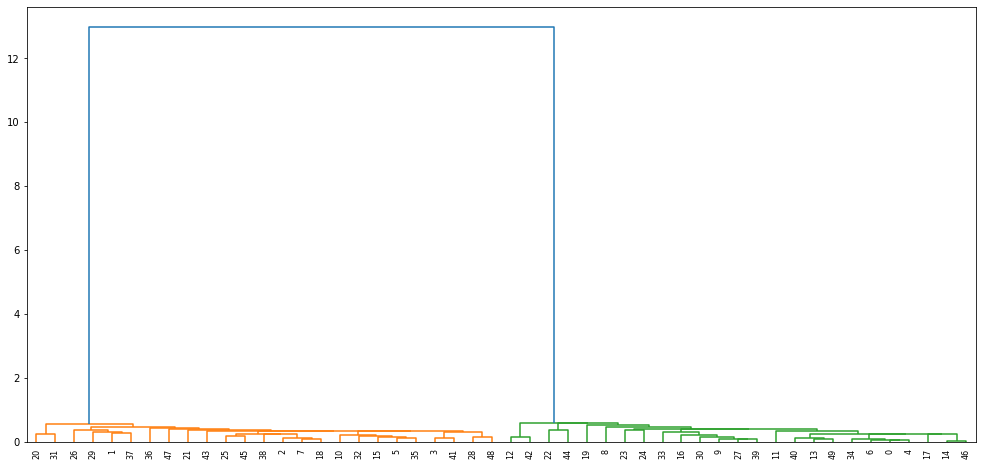

In [10]:
# We will plot a denrogram here
plt.figure(figsize=(17,8))
_ = dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

### Determining the clusters

While there are many ways to automate this process, we can visually assess the dendrogram and set a maximum distance to help estimate the clusters.

Here, we can see that no links exist above a distance of 2 - use the ```fclusters``` function from ```scipy.cluster.hierarchy``` with this max distance to return our cluster IDs. 

In [11]:
max_dist = 2 # pairwise distance

# Fcluster here
points['cluster'] = fcluster(Z, max_dist, criterion='distance')
points.head()

x1        x2  color  cluster
0  6.328142  9.100035      0        2
1  6.293391 -5.771864      1        1
2  5.857193 -5.262561      1        1
3  5.172031 -5.198541      1        1
4  6.381896  9.127024      0        2

## New Dataset with CODE

<AxesSubplot:xlabel='x', ylabel='y'>

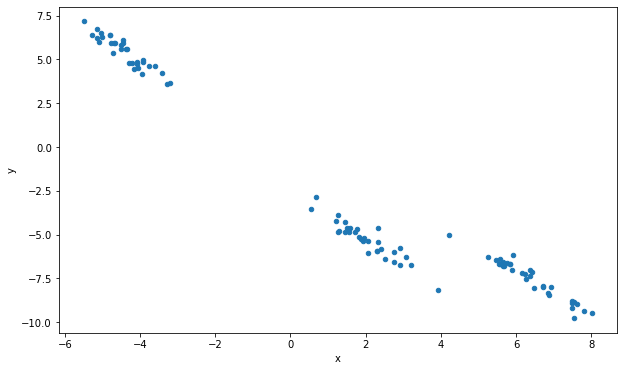

In [12]:
# Lets generate a new dataset that is a little more interesting
random_state = 161
X, y = make_blobs(n_samples=100, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

noisy_moons = pd.DataFrame(X, columns=["x", "y"])
noisy_moons.plot(kind="scatter", x="x", y="y", figsize=(10, 6))

In [14]:
# Calculate Z single linkage
Z = linkage(X, 'single')

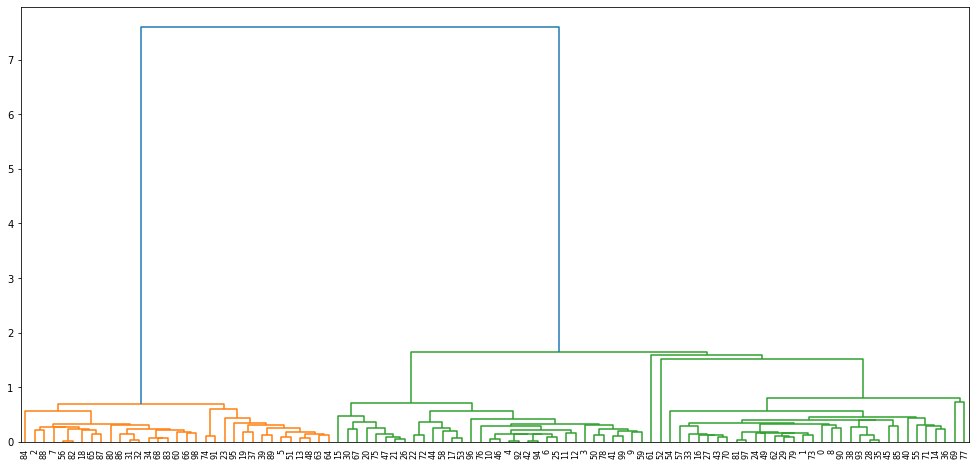

In [17]:
# Display dendrogram
plt.figure(figsize=(17,8))
dend = dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
    #link_color_func=lambda color: cmaps['Miscellaneous'],
)

In [18]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *

In [19]:
sns.set_style("darkgrid")
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

def plot_dist_thresh(max_dist=200):
    # max_dist = 200 # pairwise distance
    # plot_dendogram(lang)
    clusters = fcluster(Z, max_dist, criterion='distance')
    
    print("Clusters represented at distance: ", set(clusters))
    
    # Complete color maps from matplotlib
    
    # plotting
    # Add legend with some customizations.
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 4))

    # only using dimension 0 and 6 -- you can update this for your own implementations
    ax[0].scatter(X[:,0], X[:,1], c=clusters, cmap=cm.jet, s=40)
    ax[0].set_title("Max Dist: %d" % max_dist)
    
    # plt.legend(clusters, loc='upper right', shadow=True, scatterpoints=1)
    
    ax[0].legend(['c{}'.format(i) for i in range(len(clusters))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
        
    t = (0, max_dist)
    ax[1].plot((0, 1000), (max_dist, max_dist), 'r--')
    
    ax[1].set_title('Dendrogram')
    ax[1].set_xlabel('Index Numbers')
    ax[1].set_ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
        # link_color_func=lambda color: cmaps['Miscellaneous'],
    )
    
def plot_wrapper(max_dist):
    plot_dist_thresh(max_dist)
    plt.show()

In [20]:
interact(plot_wrapper, max_dist=FloatSlider(min=0, max=3, step=.25));

interactive(children=(FloatSlider(value=0.0, description='max_dist', max=3.0, step=0.25), Output()), _dom_clas…

Clusters represented at distance:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
Clusters represented at distance:  {1, 2, 3, 4, 5}
Clusters represented at distance:  {1, 2}


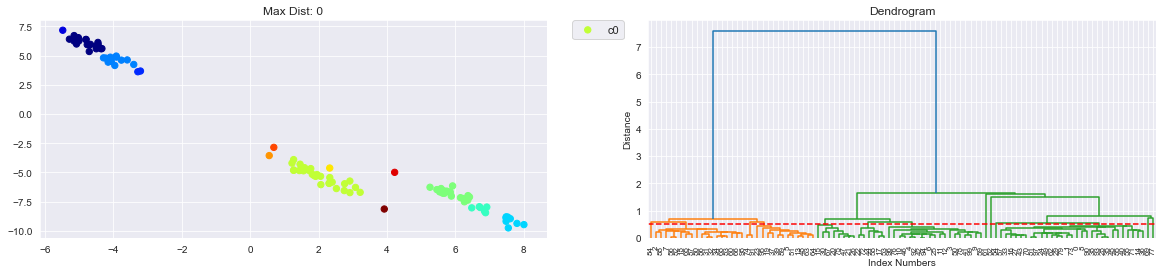

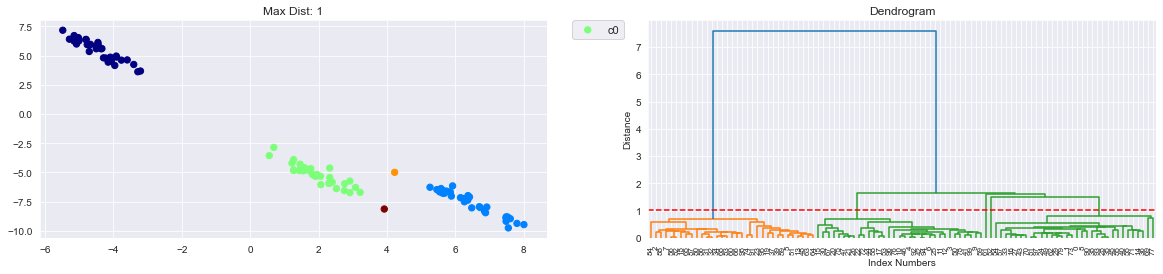

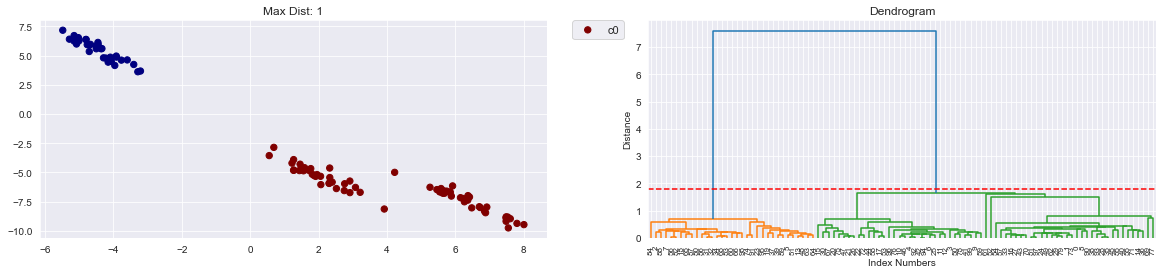

In [21]:
## You can use reuse this function if you like to test different distance threasholds

# plot_dist_thresh(250)
# plot_dist_thresh(200)
# plot_dist_thresh(150)
plot_dist_thresh(.5)
plot_dist_thresh(1.02)
plot_dist_thresh(1.8)


## Disadvantage of running H-clustering
While you can achieve good results with heirachical clustering, it is one of the most computationally ineffecient methods compared to others. Let's take a sizeable dataset (10k records) and comapre and contrast with K-Means.

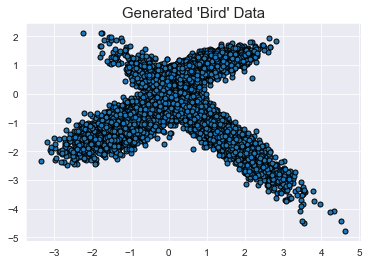

In [22]:
from sklearn.datasets import make_classification

np.random.seed(42)

plt.title("Generated 'Bird' Data",
          fontsize=15)
data, _ = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)

rdf = pd.DataFrame(data, columns=["x1", "x2"])

plt.scatter(rdf["x1"], rdf["x2"], marker='o', s=25, edgecolor='k')

Wall time: 98.8 ms


<AxesSubplot:xlabel='x1', ylabel='x2'>

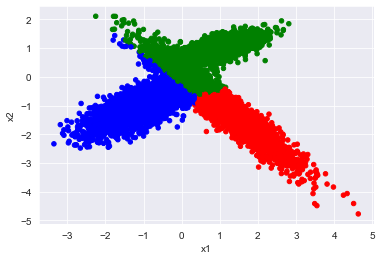

In [23]:
from sklearn.cluster import KMeans

colors = ["red", "green", "blue"]

kmeans = KMeans(n_clusters=3)
%time model  = kmeans.fit(rdf[["x1", "x2"]])

rdf['kmeans_cluster'] = model.labels_
centroids = pd.DataFrame(model.cluster_centers_)

rdf.plot(kind="scatter", x="x1", y="x2", c=rdf['kmeans_cluster'].map(lambda c: colors[c]))



In [27]:
rdf[['x1','x2']]

x1        x2
0     2.870425 -3.081461
1    -0.601852  1.027166
2    -0.964375 -0.692174
3     1.861983 -1.816665
4     1.647651 -2.051372
...        ...       ...
9995  0.000281  0.056076
9996  2.483859  1.708745
9997  1.634177  0.830076
9998  0.138988  1.019245
9999  1.410719  0.962260

[10000 rows x 2 columns]

In [28]:
## This operation can crash a notebook... BEWARE!

max_distance = 80

X = rdf[["x1", "x2"]].values

%time Z = linkage(X, 'ward') # This operation is much much slower than K-Means
clusters = fcluster(Z, max_distance, criterion='distance')

Wall time: 2.22 s


In [29]:
## This also takes a while to run as well.. might skip this in lecture (This may take a few minutes to complete!  Beware!)
# _ = dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

<AxesSubplot:xlabel='x1', ylabel='x2'>

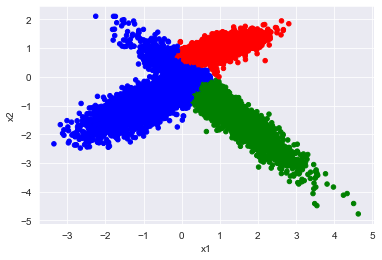

In [30]:
rdf["agglom_clusters"] = clusters
rdf.plot(kind="scatter", x="x1", y="x2", c=rdf['agglom_clusters'].map(lambda c: colors[c-1]))

## Conclusion
---

- Recall the definitions of linkage, cophenetic coefficient, and dendrogram
- Recap and recall the process steps in hierachical clustering
    - Linkage: First, we create the linkages in python that form the basis of our analysis
    - Cophenetic Coefficient: We find the cophenetic coefficient to determine how well our analysis is running
    - Dendrogram: We plot the dendrogram and visually inspect the clusters
    - Lastly, we find our cluster ID's and plot